<h1 align=center><font size = 6>Comparison of Neighborhoods in New York and Toronto</font></h1>




## Introduction

In this Notebook I have tried to solve a problem , suppose a friend of yours came to you and he wants to shift from New York to Toronto and he does not know in which neighborhood he should move . He is a very choosy guy and is afraid to move to a unfamiliar neighborhood. Here in this neighborhood i tried to solve his problem by comparing the neighborhoods of both cities and giving him a list of options to choose from and this makes his decision easy because now he can move in a neighborhood with similar features and traits as he was having in his current neighborhood in New York.

# 1. Importing Revelent Libraries

In [135]:
# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# library to handle requests
import requests 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sbs
sbs.set()

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium 

#web servers data reciving library
import wget 

#Library used to query a website
import urllib.request

# Webscrappiing library for parsing websites
from bs4 import BeautifulSoup
print('Libraries imported.')

Libraries imported.


# 2. Data Gathering and data Wrangling

> <h2> 2.1 Data Accusition<h/>

> <h5> Web Scrapping For Toronto Data </h5>

<p>As there is no specific dataset on postal codes of toronto I will get data from Wikipedia for that purpose i have to use web scrapping . I have done it by using BeautifulSoup Library</p>

In [2]:
# set the url in a variable
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

# request html file from url
page=urllib.request.urlopen(url)


In [3]:
#parsing the html and storing it in a new variable soup
soup=BeautifulSoup(page)

#seeing the nested structure of html 
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0906c2a3-efbb-4789-961b-f63b6aed2219","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

In [4]:
#checking for all avilible tables on website
all_tables=soup.find_all('table')
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighborhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue, Humber Valley Village
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern, Rouge
 </td></tr>
 <tr>
 <td>M2B


In [5]:
# defining the table that we need only
right_table=soup.find('table', {'class':'wikitable sortable'})
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td>

In [6]:
#Generate lists
A=[]
B=[]
C=[]
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
#Removing escape Sequence "\n" from lists
A = [x.replace('\n', '') for x in A]
B = [x.replace('\n', '') for x in B]
C = [x.replace('\n', '') for x in C]

> <b>Converting the Scrapped data in Pandas Dataframe</b> 

In [7]:
#creating new data frame with column names an pushing data from lists A,B and C
df=pd.DataFrame(A,columns=['Postal Code'])
df["Borough"]=B
df["Neighborhood"]=C
df.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

> <h5> Downloading New York Data  </h5>

In [8]:
a=wget.download('https://cocl.us/new_york_dataset/newyork_data.json')
print('Data downloaded!')

Data downloaded!


> <h5> Load and explore the data </h5>

In [9]:
# Loading data 
with open(a) as json_data:
    newyork_data = json.load(json_data)

In [10]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [11]:
# Extracting data 
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NY_neighborhoods = pd.DataFrame(columns=column_names)

# defining loop for filling the data in new dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_neighborhoods = NY_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
NY_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [139]:
NY_neighborhoods.to_csv('C:/Users/camar/Desktop/projects/Machine-Learning-Unsupervised-/Data/Newyork_Raw_data.csv')

In [13]:
NY_neighborhoods.shape

(306, 4)

> <h2> 2.2 Data Wrangling </h2>

In [14]:
#Creating a checkpoint
Raw_data=df.copy()
Raw_data.head()
Raw_data.shape

(180, 3)

In [136]:
# Removing rows with "Not assigned" Borough of Toronto Data
cleaned_df=Raw_data.drop(df.loc[df['Borough']=='Not assigned'].index)
cleaned_df.reset_index(drop=True,inplace=True)
cleaned_df.head(5)

Postal Code           Borough                                 Neighborhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [137]:
#grouping columns with unique Postal code and combining duplicate Postal codes
grp_df=cleaned_df.groupby(["Postal Code","Borough"]).agg({"Neighborhood":",".join}).reset_index()
grp_df.head(5)

Postal Code      Borough                            Neighborhood
0         M1B  Scarborough                          Malvern, Rouge
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2         M1E  Scarborough       Guildwood, Morningside, West Hill
3         M1G  Scarborough                                  Woburn
4         M1H  Scarborough                               Cedarbrae

In [17]:
#checking shape of dataframe
print(grp_df.shape)

(103, 3)


In [18]:
#Confirming that dataframe is correct " Extracting Postal code for M5A"
grp_df.loc[grp_df['Postal Code']=='M5A']


Postal Code           Borough               Neighborhood
53         M5A  Downtown Toronto  Regent Park, Harbourfront

In [19]:
#Checking if the unique values of postal code are equall to number of rows in data frame
grp_df["Postal Code"].nunique()

103

> #### Longitude and langitude values for Postal codes

In [20]:
#getting csv file containing lon, lat , values
Coordinates=pd.read_csv("http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv")
Coordinates.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [21]:
# Creating new dataframe with the Coordinates included
DF_LL=grp_df.copy()
DF_LL["Latitude"]=Coordinates["Latitude"]
DF_LL["Longitude"]=Coordinates["Longitude"]
DF_LL.head()

Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.806686   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [22]:
#Checking if values are correctly assigned to Postal Code 
DF_LL.loc[grp_df['Postal Code']=='M5G']

Postal Code           Borough        Neighborhood   Latitude  Longitude
57         M5G  Downtown Toronto  Central Bay Street  43.657952 -79.387383

In [140]:
DF_LL.to_csv('C:/Users/camar/Desktop/projects/Machine-Learning-Unsupervised-/Data/Toronto_Cleaned_data.csv')

> #### Creating DataFrame With Toronto Neighbourhoods

Toronto=DF_LL.loc[grp_df['Borough'].str.contains('Toronto')].reset_index(drop=True)
Toronto.head()

In [23]:
DF_LL.shape

(103, 5)

# 3. Maping of Neighbourhoods In Toronto And New York

> #### <p> Getting Geospatial data of Toronto </p>

In [24]:
address_Tor = 'Toronto'

geolocator_Tor = Nominatim(user_agent="TN_explorer")
location_Tor = geolocator_Tor.geocode(address_Tor)
latitude_Tor = location_Tor.latitude
longitude_Tor = location_Tor.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_Tor, longitude_Tor))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


> #### <p> Getting Geospatial data of New York </p>

In [25]:
address_NY = 'New York City, NY'

geolocator_NY = Nominatim(user_agent="ny_explorer")
location_NY = geolocator_NY.geocode(address_NY)
latitude_NY = location_NY.latitude
longitude_NY = location_NY.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


> #### <p> Visualization of Toronto and its Neighbourhoods </p>

In [26]:
# map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude_Tor, longitude_Tor], zoom_start=10)

# add markers to map
for lat, lng, label in zip(DF_LL['Latitude'], DF_LL['Longitude'], DF_LL['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

> #### <p> Visualization of New York and its Neighbourhoods </p>

In [27]:
# map of New York using latitude and longitude values
map_New_York = folium.Map(location=[latitude_NY, longitude_NY], zoom_start=10)

# add markers to map
for lat, lng, label in zip(NY_neighborhoods['Latitude'], NY_neighborhoods['Longitude'], NY_neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_New_York)  
    
map_New_York

#### Foresquare Credentials

In [28]:
CLIENT_ID = 'MCZFAP1NVEMUKKN15OHGOVFV5VH3X43VYUFXNQO5YJGYC1MP' # your Foursquare ID
CLIENT_SECRET = 'PKNLGKBDCEAOBWURJZEAVB30ATNRP1MJGTAVQC3ITJKWKRVT' # your Foursquare Secret
VERSION = '20200604' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API

# 4. Exploring The Neighbourhoods in Toronto and New York


###### <p> Creating a function that returns near venues for All the neighbourhoods in given place using Foresquare API </p> 

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

> ###### Creating a new dataframes for Veneus

In [31]:
# taking venues for Toronto
Toronto_venues = getNearbyVenues(names=DF_LL['Neighborhood'],
                                   latitudes=DF_LL['Latitude'],
                                   longitudes=DF_LL['Longitude']
                                  )


Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [37]:
# taking venues for New York
NY_venues = getNearbyVenues(names=NY_neighborhoods['Neighborhood'],
                                   latitudes=NY_neighborhoods['Latitude'],
                                   longitudes=NY_neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

###### Size of new dataframe

In [38]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2115, 7)


Neighborhood  Neighborhood Latitude  \
0                          Malvern, Rouge              43.806686   
1  Rouge Hill, Port Union, Highland Creek              43.784535   
2       Guildwood, Morningside, West Hill              43.763573   
3       Guildwood, Morningside, West Hill              43.763573   
4       Guildwood, Morningside, West Hill              43.763573   

   Neighborhood Longitude                  Venue  Venue Latitude  \
0              -79.194353                Wendy’s       43.807448   
1              -79.160497  Royal Canadian Legion       43.782533   
2              -79.188711         RBC Royal Bank       43.766790   
3              -79.188711      G & G Electronics       43.765309   
4              -79.188711       Big Bite Burrito       43.766299   

   Venue Longitude        Venue Category  
0       -79.199056  Fast Food Restaurant  
1       -79.163085                   Bar  
2       -79.191151                  Bank  
3       -79.191537     Electronics Store  
4       -79.190720    Mexican Restaurant

In [39]:
print(NY_venues.shape)
NY_venues.head()

(9933, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3          Rite Aid       40.896649       -73.844846        Pharmacy  
4           Dunkin'       40.890459       -73.849089      Donut Shop

> checking for unique values in veneus df


In [40]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))
print('There are {} uniques categories.'.format(len(NY_venues['Venue Category'].unique())))

There are 269 uniques categories.
There are 425 uniques categories.


## 5. Grouping Data And Dealing with Catagorical variables

> Dealing with catagorical data through "one hot encoding" Dummie Variables

In [41]:
# one hot encoding Toronto
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

Toronto_onehot.head()

Accessories Store  Afghan Restaurant  Airport  Airport Food Court  \
0                  0                  0        0                   0   
1                  0                  0        0                   0   
2                  0                  0        0                   0   
3                  0                  0        0                   0   
4                  0                  0        0                   0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    1               0   
2          0           0           0       0     1    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
0                 0                 0                   0      0   
1                 0                 0                   0      0   
2                 0                 0                   0      0   
3                 0                 0                   0      0   
4                 0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0       0              0          0         0                     0   
1       0              0          0         0                     0   
2       0              0          0         0                     0   
3       0              0          0         0                     0   
4       0              0          0         0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
0               0        0            0                0         0   
1               0        0            0                0         0   
2               0        0            0                0         0   
3               0        0            0                0         0   
4               0        0            0                0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Business Servic

In [42]:
# move neighborhood column to the first column
Col='Neighborhood'
first_col=Toronto_onehot.pop('Neighborhood')
Toronto_onehot.insert(0, Col, first_col)
Toronto_onehot.head()

Neighborhood  Accessories Store  \
0                          Malvern, Rouge                  0   
1  Rouge Hill, Port Union, Highland Creek                  0   
2       Guildwood, Morningside, West Hill                  0   
3       Guildwood, Morningside, West Hill                  0   
4       Guildwood, Morningside, West Hill                  0   

   Afghan Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                  0        0                   0               0   
1                  0        0                   0               0   
2                  0        0                   0               0   
3                  0        0                   0               0   
4                  0        0                   0               0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0                0                 0                    0             0   
1                0                 0                    0             0   
2                0                 0                    0             0   
3                0                 0                    0             0   
4                0                 0                    0             0   

   Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0         0            0           0                    0                 0   
1         0            0           0                    0                 0   
2         0            0           0                    0                 0   
3         0            0           0                    0                 0   
4         0            0           0                    0                 0   

   Athletics & Sports  Auto Garage  Auto Workshop  BBQ Joint  Baby Store  \
0                   0            0              0          0           0   
1                   0            0              0          0           0   
2                   0            0              0          0           0   
3                   0            0              0          0           0   
4                   0            0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    1               0                 0   
2           0       0     1    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0                 0                   0      0                0         0   
1                 0                   0      0                0         0   
2                 0                   0      0                0         0   
3                 0                   0      0                0         0   
4                 0                   0      0                0         0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
0           0                   0          0       0              0   
1           0                   0          0       0              0   
2           0                   0          0       0              0   
3           0                   0          0       0              0   
4           0                   0          0       0              0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0          0         0                     0               0        0   
1          0         0                     0               0        0   
2          0         0                     0               0        0   
3          0         0                     0               0        0   
4          0         0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0            0        

In [43]:
# one hot encoding New York
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Neighborhood'] = NY_venues['Neighborhood'] 

NY_onehot.head()

Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0                  0               0                  0                   0   
1                  0               0                  0                   0   
2                  0               0                  0                   0   
3                  0               0                  0                   0   
4                  0               0                  0                   0   

   Airport Terminal  American Restaurant  Animal Shelter  Antique Shop  \
0                 0                    0               0             0   
1                 0                    0               0             0   
2                 0                    0               0             0   
3                 0                    0               0             0   
4                 0                    0               0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Garage  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0                0          0           0           0       0   
1            0                0          0           0           0       0   
2            0                0          0           0           0       0   
3            0                0          0           0           0       0   
4            0                0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0     0    0               0                 0                 0   
1     0    0               0                 0                 0   
2     0    0               0                 0                 0   
3     0    0               0                 0                 0   
4     0    0               0                 0                 0   

   Basketball Stadium  Bath House  Beach  Beach Bar  Beer Bar  Beer Garden  \
0                   0           0      0          0         0            0   
1                   0           0      0          0         0            0   
2                   0           0      0          0         0            0   
3                   0           0      0          0         0            0   
4                   0           0      0          0         0            0   

   Beer Store  Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  \
0           0              0                         0          0           0   
1           0              0                         0          0           0   
2           0              0                         0          0           0   
3           0              0                   

In [44]:
# move neighborhood column to the first column
Col_1='Neighborhood'
first_col=NY_onehot.pop('Neighborhood')
NY_onehot.insert(0, Col_1, first_col)
NY_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    Wakefield                  0               0                  0   
1    Wakefield                  0               0                  0   
2    Wakefield                  0               0                  0   
3    Wakefield                  0               0                  0   
4    Wakefield                  0               0                  0   

   African Restaurant  Airport Terminal  American Restaurant  Animal Shelter  \
0                   0                 0                    0               0   
1                   0                 0                    0               0   
2                   0                 0                    0               0   
3                   0                 0                    0               0   
4                   0                 0                    0               0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0             0       0                 0                       0   
1             0       0                 0                       0   
2             0       0                 0                       0   
3             0       0                 0                       0   
4             0       0                 0                       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0            0           0                    0                     0   
1            0           0                    0                     0   
2            0           0                    0                     0   
3            0           0                    0                     0   
4            0           0                    0                     0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0                    0            0                0          0           0   
1                    0            0                0          0           0   
2                    0            0                0          0           0   
3                    0            0                0          0           0   
4                    0            0                0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Bath House  Beach  Beach Bar  \
0                 0                   0           0      0          0   
1                 0                   0           0      0          0   
2                 0                   0           0      0          0   
3                 0                   0           0      0          0   
4                 0                   0           0      0          0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0         0            0           0              0                         0   
1         0            0           0              0                         0   
2         0            0           0              0                         0   
3         0            0           0              0                         0   
4         0            0 

###### Grouping the veneus according to there neighbourhoods

In [143]:
Toronto_grouped=Toronto_onehot.groupby("Neighborhood").mean().reset_index()
Toronto_grouped.head()


Neighborhood  Accessories Store  \
0                                        Agincourt                0.0   
1                           Alderwood, Long Branch                0.0   
2  Bathurst Manor, Wilson Heights, Downsview North                0.0   
3                                  Bayview Village                0.0   
4                Bedford Park, Lawrence Manor East                0.0   

   Afghan Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                0.0      0.0                 0.0             0.0   
1                0.0      0.0                 0.0             0.0   
2                0.0      0.0                 0.0             0.0   
3                0.0      0.0                 0.0             0.0   
4                0.0      0.0                 0.0             0.0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0              0.0               0.0             0.000000           0.0   
1              0.0               0.0             0.000000           0.0   
2              0.0               0.0             0.000000           0.0   
3              0.0               0.0             0.000000           0.0   
4              0.0               0.0             0.043478           0.0   

   Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0       0.0          0.0         0.0                  0.0               0.0   
1       0.0          0.0         0.0                  0.0               0.0   
2       0.0          0.0         0.0                  0.0               0.0   
3       0.0          0.0         0.0                  0.0               0.0   
4       0.0          0.0         0.0                  0.0               0.0   

   Athletics & Sports  Auto Garage  Auto Workshop  BBQ Joint  Baby Store  \
0            0.000000          0.0            0.0        0.0         0.0   
1            0.111111          0.0            0.0        0.0         0.0   
2            0.000000          0.0            0.0        0.0         0.0   
3            0.000000          0.0            0.0        0.0         0.0   
4            0.000000          0.0            0.0        0.0         0.0   

   Bagel Shop  Bakery      Bank  Bar  Baseball Field  Baseball Stadium  \
0         0.0     0.0  0.000000  0.0             0.0               0.0   
1         0.0     0.0  0.000000  0.0             0.0               0.0   
2         0.0     0.0  0.095238  0.0             0.0               0.0   
3         0.0     0.0  0.250000  0.0             0.0               0.0   
4         0.0     0.0  0.000000  0.0             0.0               0.0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0       0.0   
1               0.0                 0.0    0.0              0.0       0.0   
2               0.0                 0.0    0.0              0.0       0.0   
3               0.0                 0.0    0.0              0.0       0.0   
4               0.0                 0.0    0.0              0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
0         0.0                 0.0        0.0     0.0            0.0   
1         0.0                 0.0        0.0     0.0            0.0   
2         0.0                 0.0        0.0     0.0            0.0   
3         0.0                 0.0        0.0     0.0            0.0   
4         0.0                 0.0        0.0     0.0            0.0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0        0.0       0.0                   0.0             0.2      0.0   
1        0.0       0.0                   0.0             0.0      0.0   
2        0.0       0.0                   0.0             0.0      0.0   
3        0.0       0.0                   0.0             0.0      0.0   
4        0.0       0.0                   0.0             0.0      0.0   

   Bridal Shop  Bubble Tea 

In [ ]:
Toronto_grouped.to_csv('C:/Users/camar/Desktop/projects/Machine-Learning-Unsupervised-/Data/Toronto_Grouped_venues.csv')

In [47]:
NY_grouped=NY_onehot.groupby("Neighborhood").mean().reset_index()
NY_grouped.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0       Allerton                0.0             0.0                0.0   
1       Annadale                0.0             0.0                0.0   
2  Arden Heights                0.0             0.0                0.0   
3      Arlington                0.0             0.0                0.0   
4       Arrochar                0.0             0.0                0.0   

   African Restaurant  Airport Terminal  American Restaurant  Animal Shelter  \
0                 0.0               0.0             0.000000             0.0   
1                 0.0               0.0             0.090909             0.0   
2                 0.0               0.0             0.000000             0.0   
3                 0.0               0.0             0.200000             0.0   
4                 0.0               0.0             0.000000             0.0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0     0.0               0.0                     0.0   
1           0.0     0.0               0.0                     0.0   
2           0.0     0.0               0.0                     0.0   
3           0.0     0.0               0.0                     0.0   
4           0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0                   0.0   
1          0.0         0.0                  0.0                   0.0   
2          0.0         0.0                  0.0                   0.0   
3          0.0         0.0                  0.0                   0.0   
4          0.0         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0               0.0            0.000000         0.0                    0.0   
1               0.0            0.000000         0.0                    0.0   
2               0.0            0.000000         0.0                    0.0   
3               0.0            0.000000         0.0                    0.0   
4               0.0            0.045455         0.0                    0.0   

   Austrian Restaurant  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0                  0.0          0.0              0.0        0.0         0.0   
1                  0.0          0.0              0.0        0.0         0.0   
2                  0.0          0.0              0.0        0.0         0.0   
3                  0.0          0.0              0.0        0.0         0.0   
4                  0.0          0.0              0.0        0.0         0.0   

   Bagel Shop    Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0    0.000000  0.034483   0.0  0.0             0.0               0.0   
1    0.000000  0.090909   0.0  0.0             0.0               0.0   
2    0.000000  0.000000   0.0  0.0             0.0               0.0   
3    0.000000  0.000000   0.0  0.0             0.0               0.0   
4    0.090909  0.000000   0.0  0.0             0.0               0.0   

   Basketball Court  Basketball Stadium  Bath House  Beach  Beach Bar  \
0               0.0                 0.0         0.0    0.0        0.0   
1               0.0                 0.0         0.0    0.0        0.0   
2               0.0                 0.0         0.0    0.0        0.0   
3               0.0                 0.0         0.0    0.0        0.0   
4               0.0                 0.0         0.0    0.0        0.0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0       0.0          0.0         0.0            0.0                       0.0   
1       0.0          0.0         0.0            0.0                       0.0   
2       0.0          0.0         0.0            0.0                       0.0   
3       0.0          0.0         0.0            0.0                       0.0   
4  

In [144]:
NY_grouped.to_csv('C:/Users/camar/Desktop/projects/Machine-Learning-Unsupervised-/Data/NY_Grouped_venues.csv')

In [48]:
print(Toronto_grouped.shape)
print(NY_grouped.shape)

(94, 269)
(300, 425)


# 6. Merging datasets For Cluster Analysis

In [50]:
# creating lists of columns and Combining them together
L1 = list(NY_grouped.columns)
L2 = list(Toronto_grouped.columns)
L=list(set(L1).intersection(L2))

#mearging the two data sets
Merged_df=pd.merge(NY_grouped,Toronto_grouped, on=L,how='outer')
# deleting the columns that are not common in both data sets
cols = [col for col in Merged_df.columns if col not in L]
Merged_df=Merged_df.drop(cols,axis=1)
Merged_df.head()

Neighborhood  Accessories Store  Afghan Restaurant  Airport Terminal  \
0       Allerton                0.0                0.0               0.0   
1       Annadale                0.0                0.0               0.0   
2  Arden Heights                0.0                0.0               0.0   
3      Arlington                0.0                0.0               0.0   
4       Arrochar                0.0                0.0               0.0   

   American Restaurant  Antique Shop  Art Gallery  Art Museum  \
0             0.000000           0.0          0.0         0.0   
1             0.090909           0.0          0.0         0.0   
2             0.000000           0.0          0.0         0.0   
3             0.200000           0.0          0.0         0.0   
4             0.000000           0.0          0.0         0.0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                  0.0               0.0            0.000000          0.0   
1                  0.0               0.0            0.000000          0.0   
2                  0.0               0.0            0.000000          0.0   
3                  0.0               0.0            0.000000          0.0   
4                  0.0               0.0            0.045455          0.0   

   BBQ Joint  Baby Store  Bagel Shop    Bakery  Bank  Bar  Baseball Field  \
0        0.0         0.0    0.000000  0.034483   0.0  0.0             0.0   
1        0.0         0.0    0.000000  0.090909   0.0  0.0             0.0   
2        0.0         0.0    0.000000  0.000000   0.0  0.0             0.0   
3        0.0         0.0    0.000000  0.000000   0.0  0.0             0.0   
4        0.0         0.0    0.090909  0.000000   0.0  0.0             0.0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  Beer Bar  \
0               0.0               0.0                 0.0    0.0       0.0   
1               0.0               0.0                 0.0    0.0       0.0   
2               0.0               0.0                 0.0    0.0       0.0   
3               0.0               0.0                 0.0    0.0       0.0   
4               0.0               0.0                 0.0    0.0       0.0   

   Beer Store  Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0         0.0        0.0     0.0            0.0        0.0       0.0   
1         0.0        0.0     0.0            0.0        0.0       0.0   
2         0.0        0.0     0.0            0.0        0.0       0.0   
3         0.0        0.0     0.0            0.2        0.0       0.0   
4         0.0        0.0     0.0            0.0        0.0       0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0        0.034483      0.0          0.0   
1                   0.0        0.000000      0.0          0.0   
2                   0.0        0.000000      0.0          0.0   
3                   0.0        0.000000      0.0          0.0   
4                   0.0        0.000000      0.0          0.0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0       0.0           0.0            0.0       0.0   
1              0.0       0.0           0.0            0.0       0.0   
2              0.0       0.0           0.0            0.0       0.0   
3              0.0       0.0           0.0            0.0       0.0   
4              0.0       0.0           0.0            0.0       0.0   

   Bus Station  Business Service  Butcher  Café  Cajun / Creole Restaurant  \
0     0.034483               0.0      0.0   0.0                        0.0   
1     0.000000               0.0      0.0   0.0                        0.0   
2     0.000000               0.0      0.0   0.0                        0.0   
3     0.000000               0.0      0.0   0.0                        0.0   
4     0.000000               0.0      0.0   0.0                        0.0   

   Camera Store  Candy Store  Caribbean R

In [145]:
Merged_df.shape

(394, 237)

In [141]:
Merged_df.to_csv('C:/Users/camar/Desktop/projects/Machine-Learning-Unsupervised-/Data/Newyork_Toronto_Merged.csv')

# 7. Feature Extraction and Dimensionality Reduction 

> ### 7.1 Missing Value Ratio

In [54]:
Merged_df.isnull().sum()/len(Merged_df)*100

Neighborhood                       0.0
Accessories Store                  0.0
Afghan Restaurant                  0.0
Airport Terminal                   0.0
American Restaurant                0.0
Antique Shop                       0.0
Art Gallery                        0.0
Art Museum                         0.0
Arts & Crafts Store                0.0
Asian Restaurant                   0.0
Athletics & Sports                 0.0
Auto Garage                        0.0
BBQ Joint                          0.0
Baby Store                         0.0
Bagel Shop                         0.0
Bakery                             0.0
Bank                               0.0
Bar                                0.0
Baseball Field                     0.0
Baseball Stadium                   0.0
Basketball Court                   0.0
Basketball Stadium                 0.0
Beach                              0.0
Beer Bar                           0.0
Beer Store                         0.0
Bike Shop                

> ### 7.2 Low Variance Filter

In [55]:
Merged_df.var()

Accessories Store                  5.874894e-05
Afghan Restaurant                  1.399574e-05
Airport Terminal                   4.382188e-05
American Restaurant                1.311999e-03
Antique Shop                       1.516048e-05
Art Gallery                        1.035233e-04
Art Museum                         1.066197e-04
Arts & Crafts Store                1.950155e-04
Asian Restaurant                   4.170344e-04
Athletics & Sports                 6.196938e-04
Auto Garage                        1.017557e-04
BBQ Joint                          6.472628e-05
Baby Store                         9.028462e-06
Bagel Shop                         9.994741e-04
Bakery                             1.150949e-03
Bank                               1.393480e-03
Bar                                4.192805e-03
Baseball Field                     5.594778e-03
Baseball Stadium                   5.518854e-05
Basketball Court                   3.216267e-04
Basketball Stadium                 1.870

> ### 7.3 High Correlation filter

In [56]:
Merged_df.corr()

Accessories Store  Afghan Restaurant  \
Accessories Store                         1.000000          -0.010134   
Afghan Restaurant                        -0.010134           1.000000   
Airport Terminal                         -0.008271          -0.005623   
American Restaurant                      -0.023816          -0.025490   
Antique Shop                             -0.018314          -0.012451   
Art Gallery                              -0.032178          -0.015193   
Art Museum                               -0.009297          -0.006321   
Arts & Crafts Store                      -0.015419          -0.002679   
Asian Restaurant                         -0.015948          -0.019685   
Athletics & Sports                       -0.022434          -0.015252   
Auto Garage                              -0.006462          -0.004394   
BBQ Joint                                -0.028409          -0.010861   
Baby Store                               -0.007107          -0.004832   
Bagel Shop                               -0.017618           0.003324   
Bakery                                   -0.042957           0.037513   
Bank                                     -0.044109          -0.038192   
Bar                                      -0.034409          -0.008406   
Baseball Field                            0.007725          -0.010144   
Baseball Stadium                         -0.008107          -0.005512   
Basketball Court                         -0.016809           0.136719   
Basketball Stadium                       -0.013345          -0.009073   
Beach                                    -0.019042          -0.012947   
Beer Bar                                 -0.028791           0.002504   
Beer Store                               -0.017274          -0.011744   
Bike Shop                                -0.013270          -0.009022   
Bistro                                   -0.019020          -0.012932   
Boat or Ferry                            -0.014915          -0.010141   
Bookstore                                -0.018718          -0.008012   
Boutique                                  0.280910          -0.007413   
Brazilian Restaurant                     -0.013958           0.373729   
Breakfast Spot                           -0.029576           0.019824   
Brewery                                  -0.019530          -0.013278   
Bridal Shop                              -0.008392           0.021502   
Bubble Tea Shop                          -0.000664           0.002163   
Building                                 -0.017611          -0.011974   
Burger Joint                             -0.008208          -0.003277   
Burrito Place                            -0.024243          -0.004606   
Bus Line                                 -0.017965          -0.012214   
Bus Station                               0.050413          -0.024450   
Business Service                         -0.013788          -0.009375   
Butcher                                  -0.018415          -0.012520   
Café                                     -0.049310           0.002497   
Cajun / Creole Restaurant                -0.014918          -0.010143   
Camera Store                             -0.009469          -0.006438   
Candy Store                              -0.011683          -0.007943   
Caribbean Restaurant                      0.013818          -0.020002   
Cheese Shop                              -0.021417          -0.014561   
Chinese Restaurant                        0.028618           0.007210   
Chocolate Shop                           -0.014237          -0.009680   
Church                                   -0.010276          -0.006986   
Climbing Gym                             -0.012249          -0.008328   
Clothing Store                            0.270153          -0.012526   
Cocktail Bar                             -0.036352          -0.002639   
Coffee Shop                               0.106592          -0.009376   
College Arts Build

> ### 7.4 Principal Component Analysis

Text(0, 0.5, 'cumulative explained variance')

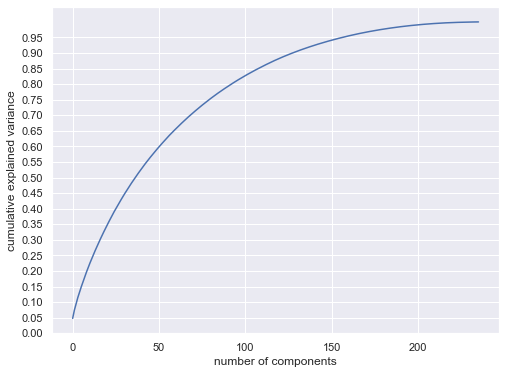

In [68]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

neigh_name = Merged_df['Neighborhood']
df_grouped_clustering = Merged_df.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [73]:
# Lowering the dimentionality to 170 features 
pca = PCA(n_components=170)
dataset = pca.fit_transform(data_rescaled)

In [74]:
print(dataset.shape)
print(Merged_df.shape)
pca

(394, 170)
(394, 237)


PCA(copy=True, iterated_power='auto', n_components=170, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'cumulative explained variance')

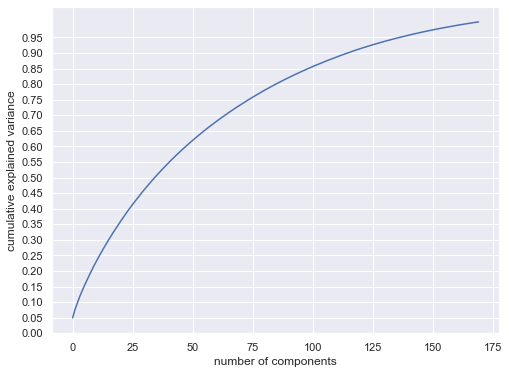

In [75]:
pca = PCA().fit(dataset)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# 8. Clustering The Data

> ## 8.1 Finding optimal number of clusters

>> ### 8.1.1 Elbow Method

In [77]:
# Creating a list for within cluster sum of squares and appending values
wcss=[]
for i in range(1,30):
    kmeans=KMeans(i)
    kmeans.fit(dataset)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

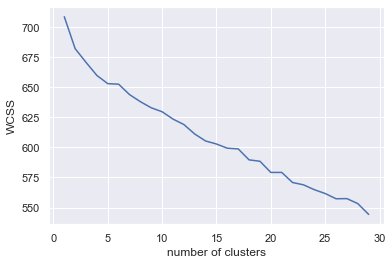

In [78]:
#ploting 
num_clust=range(1,30)
plt.plot(num_clust,wcss)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()


>> ### 8.1.2 The Silhouette Method

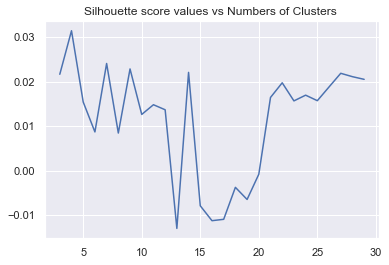

Optimal number of components is:
4


In [81]:
import sklearn
obs = dataset.copy() 
silhouette_score_values=[]
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

>> ### 8.1.3 Gap Statistic

In [113]:
from gap_statistic import OptimalK
optimalK = OptimalK(n_jobs=5, parallel_backend='multiprocessing')
n_clusters = optimalK(obs, cluster_array=np.arange(3, 7))

print('Optimal clusters: ', n_clusters)
optimalK.gap_df.head()

Optimal clusters:  5


n_clusters  gap_value         gap*  ref_dispersion_std        sk  \
0         3.0   1.640398  2861.040440           19.971700  0.006492   
1         4.0   1.658045  2837.588983           10.766309  0.003550   
2         5.0   1.664449  2818.692808            7.035551  0.002338   
3         6.0   1.654093  2791.082542           14.586533  0.004875   

           sk*      diff        diff*  
0  3303.725426 -0.021713  3297.103873  
1  3276.589111  0.008827  3269.414967  
2  3254.756241  0.009955  3257.692935  
3  3222.908525       NaN          NaN

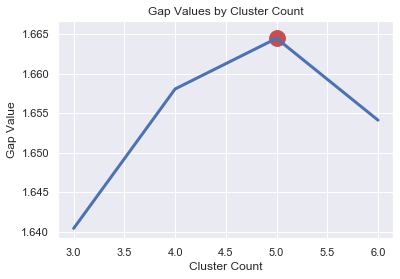

In [114]:
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

> ## 8.2 K-Mean Clustering

In [116]:
k= 5


# run k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2,).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [117]:
#Creating a new data frame with clusters
Merged_with_clusters = Merged_df.copy()
Merged_with_clusters.insert(1, 'Cluster_Labels', kmeans.labels_)
Merged_with_clusters.head()

Neighborhood  Cluster_Labels  Accessories Store  Afghan Restaurant  \
0       Allerton               1                0.0                0.0   
1       Annadale               1                0.0                0.0   
2  Arden Heights               1                0.0                0.0   
3      Arlington               1                0.0                0.0   
4       Arrochar               1                0.0                0.0   

   Airport Terminal  American Restaurant  Antique Shop  Art Gallery  \
0               0.0             0.000000           0.0          0.0   
1               0.0             0.090909           0.0          0.0   
2               0.0             0.000000           0.0          0.0   
3               0.0             0.200000           0.0          0.0   
4               0.0             0.000000           0.0          0.0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.0                  0.0               0.0            0.000000   
1         0.0                  0.0               0.0            0.000000   
2         0.0                  0.0               0.0            0.000000   
3         0.0                  0.0               0.0            0.000000   
4         0.0                  0.0               0.0            0.045455   

   Auto Garage  BBQ Joint  Baby Store  Bagel Shop    Bakery  Bank  Bar  \
0          0.0        0.0         0.0    0.000000  0.034483   0.0  0.0   
1          0.0        0.0         0.0    0.000000  0.090909   0.0  0.0   
2          0.0        0.0         0.0    0.000000  0.000000   0.0  0.0   
3          0.0        0.0         0.0    0.000000  0.000000   0.0  0.0   
4          0.0        0.0         0.0    0.090909  0.000000   0.0  0.0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0             0.0               0.0               0.0                 0.0   
1             0.0               0.0               0.0                 0.0   
2             0.0               0.0               0.0                 0.0   
3             0.0               0.0               0.0                 0.0   
4             0.0               0.0               0.0                 0.0   

   Beach  Beer Bar  Beer Store  Bike Shop  Bistro  Boat or Ferry  Bookstore  \
0    0.0       0.0         0.0        0.0     0.0            0.0        0.0   
1    0.0       0.0         0.0        0.0     0.0            0.0        0.0   
2    0.0       0.0         0.0        0.0     0.0            0.0        0.0   
3    0.0       0.0         0.0        0.0     0.0            0.2        0.0   
4    0.0       0.0         0.0        0.0     0.0            0.0        0.0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0       0.0                   0.0        0.034483      0.0          0.0   
1       0.0                   0.0        0.000000      0.0          0.0   
2       0.0                   0.0        0.000000      0.0          0.0   
3       0.0                   0.0        0.000000      0.0          0.0   
4       0.0                   0.0        0.000000      0.0          0.0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0       0.0           0.0            0.0       0.0   
1              0.0       0.0           0.0            0.0       0.0   
2              0.0       0.0           0.0            0.0       0.0   
3              0.0       0.0           0.0            0.0       0.0   
4              0.0       0.0           0.0            0.0       0.0   

   Bus Station  Business Service  Butcher  Café  Cajun / Creole Restaurant  \
0     0.034483               0.0      0.0   0.0                        0.0   
1     0.000000               0.0      0.0   0.0                        0.0   
2     0.000000               0.0      0.0   0.0                        0.0   
3     0.000000               0.0      0.0   0.0                        0.0   
4     0.000000          

> ## 8.3 Merging Data with respective Clusters 

In [118]:
# Extracting neighbourhood and cluster colum from dataframe  
df_cluster_neighborhood = Merged_with_clusters[['Cluster_Labels', 'Neighborhood']]
Toronto_merged = DF_LL[['Neighborhood', 'Latitude', 'Longitude']]
Toronto_merged = Toronto_merged.merge(df_cluster_neighborhood, on = 'Neighborhood', how = 'left')
NY_merged =NY_neighborhoods[['Neighborhood', 'Latitude', 'Longitude']]
NY_merged = NY_merged.merge(df_cluster_neighborhood, on = 'Neighborhood', how = 'left')
Toronto_merged.dropna(inplace=True)
NY_merged.dropna(inplace=True)
print(Toronto_merged.shape)
print(NY_merged.shape)

(99, 4)
(305, 4)


In [125]:
Toronto_merged.head()

Neighborhood   Latitude  Longitude  \
0                          Malvern, Rouge  43.806686 -79.194353   
1  Rouge Hill, Port Union, Highland Creek  43.784535 -79.160497   
2       Guildwood, Morningside, West Hill  43.763573 -79.188711   
3                                  Woburn  43.770992 -79.216917   
4                               Cedarbrae  43.773136 -79.239476   

   Cluster_Labels  
0             3.0  
1             0.0  
2             0.0  
3             0.0  
4             1.0

# 9. Visualization of Clusters on Map

> ### 9.1 Visualizing clusters of neighborhoods in Toronto

In [132]:
# create map
map_clusters = folium.Map(location=[latitude_Tor, longitude_Tor], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'],Toronto_merged['Neighborhood'], Toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

> ### 9.2  Visualizing clusters of neighborhoods in NY

In [133]:
# create map
map_clusters_NY = folium.Map(location=[latitude_NY, longitude_NY], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_merged['Latitude'], NY_merged['Longitude'],NY_merged['Neighborhood'], NY_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5).add_to(map_clusters_NY)
       
map_clusters_NY